<a href="https://colab.research.google.com/github/srivatsan88/YouTubeLI/blob/master/statistics/Statistical_Thinking_Imputing_Missing_Value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The video link of code walkthrough is here - https://www.youtube.com/watch?v=JGv9gaCU0i4

In [0]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
churn_master_df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_st.csv')

In [0]:
churn_df = churn_master_df.copy()

In [0]:
churn_df.head()

,customerID,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


customerID - Customer ID

SeniorCitizen - Whether the customer is a senior citizen or not (1, 0)

tenure - Number of months the customer has stayed with the company

ServiceCount - Number of services/product customer has availed

Contract - The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling - Whether the customer has paperless billing or not (Yes, No)

MonthlyCharges - The amount charged to the customer monthly

TotalCharges - The total amount charged to the customer

Churn - Whether the customer churned or not (Yes or No)

In [0]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   tenure            7043 non-null   int64  
 3   ServiceCount      7043 non-null   int64  
 4   Contract          7043 non-null   object 
 5   PaperlessBilling  7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7015 non-null   float64
 8   Churn             7043 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 495.3+ KB


In [0]:
churn_df.isna().sum()

customerID           0
SeniorCitizen        0
tenure               0
ServiceCount         0
Contract             0
PaperlessBilling     0
MonthlyCharges       0
TotalCharges        28
Churn                0
dtype: int64

In [0]:
print ("Rows     : " ,churn_df.shape[0])
print ("Columns  : " ,churn_df.shape[1])
print ("\nFeatures : \n" ,churn_df.columns.tolist())
print ("\nMissing values :  ", churn_df.isnull().any())
print ("\nUnique values :  \n",churn_df.nunique())

Rows     :  7043
Columns  :  9

Features : 
 ['customerID', 'SeniorCitizen', 'tenure', 'ServiceCount', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   customerID          False
SeniorCitizen       False
tenure              False
ServiceCount        False
Contract            False
PaperlessBilling    False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

Unique values :  
 customerID          7043
SeniorCitizen          2
tenure                73
ServiceCount           9
Contract               3
PaperlessBilling       2
MonthlyCharges      1585
TotalCharges        6514
Churn                  2
dtype: int64


In [0]:
churn_df[churn_df.isna().any(axis=1)]

,customerID,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,0,0,5,Two year,Yes,52.55,NaN,No
699,8338-QIUNR,0,72,6,Two year,Yes,66.50,NaN,No
753,3115-CZMZD,0,0,7,Two year,No,20.25,NaN,No
936,5709-LVOEQ,0,0,7,Two year,No,80.85,NaN,No
939,0347-UBKUZ,0,15,7,Month-to-month,No,19.90,NaN,No
1037,4581-LNWUM,0,13,4,Month-to-month,No,49.15,NaN,No
1082,4367-NUYAO,0,0,8,Two year,No,25.75,NaN,No
1340,1371-DWPAZ,0,0,6,Two year,No,56.05,NaN,No
1541,2429-AYKKO,0,72,7,Two year,No,19.85,NaN,No
1914,5356-CSVSQ,0,3,5,Month-to-month,No,64.60,NaN,No


In [0]:
churn_df[churn_df['tenure']==0]

,customerID,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,0,0,5,Two year,Yes,52.55,NaN,No
753,3115-CZMZD,0,0,7,Two year,No,20.25,NaN,No
936,5709-LVOEQ,0,0,7,Two year,No,80.85,NaN,No
1082,4367-NUYAO,0,0,8,Two year,No,25.75,NaN,No
1340,1371-DWPAZ,0,0,6,Two year,No,56.05,NaN,No
3331,7644-OMVMY,0,0,7,Two year,No,19.85,NaN,No
3826,3213-VVOLG,0,0,8,Two year,No,25.35,NaN,No
4380,2520-SGTTA,0,0,7,Two year,No,20.00,NaN,No
5218,2923-ARZLG,0,0,7,One year,Yes,19.70,NaN,No
6670,4075-WKNIU,0,0,7,Two year,No,73.35,NaN,No


In [0]:
churn_df['TotalCharges'].describe()

count    7015.000000
mean     2284.315310
std      2267.765142
min        18.800000
25%       401.400000
50%      1398.250000
75%      3794.975000
max      8684.800000
Name: TotalCharges, dtype: float64

In [0]:
churn_df[churn_df['Churn']=='No'].describe()

,SeniorCitizen,tenure,ServiceCount,MonthlyCharges,TotalCharges
count,5174.000000,5174.000000,5174.000000,5174.000000,5146.000000
mean,0.128721,37.569965,5.811751,61.265124,2557.626312
std,0.334923,24.113777,1.890418,31.092648,2330.764669
min,0.000000,0.000000,1.000000,18.250000,18.800000
25%,0.000000,15.000000,4.000000,25.100000,578.625000
50%,0.000000,38.000000,6.000000,64.425000,1686.025000
75%,0.000000,61.000000,7.000000,88.400000,4264.900000
max,1.000000,72.000000,9.000000,118.750000,8672.450000


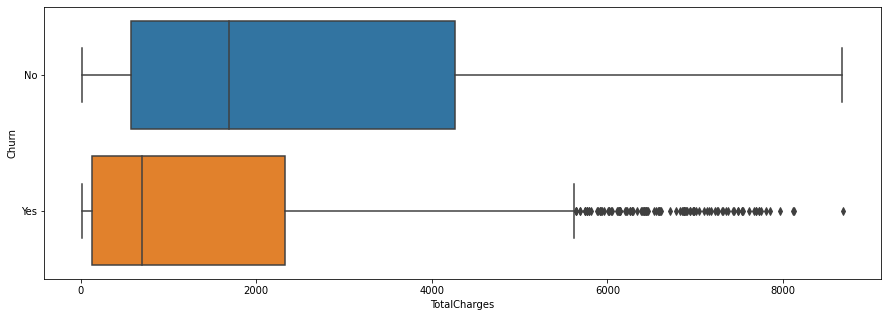

In [0]:
plt.figure(figsize=(15,5))
sns.boxplot(x="TotalCharges", y="Churn", data=churn_df)

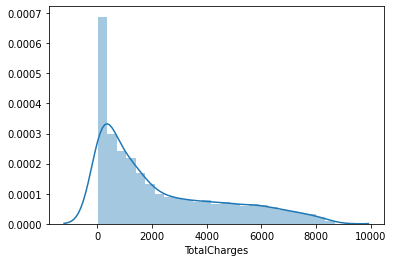

In [0]:
sns.distplot(churn_df['TotalCharges'], hist=True)

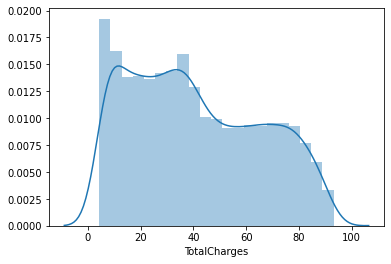

In [0]:
sns.distplot(churn_df['TotalCharges'].apply(np.sqrt), hist=True)

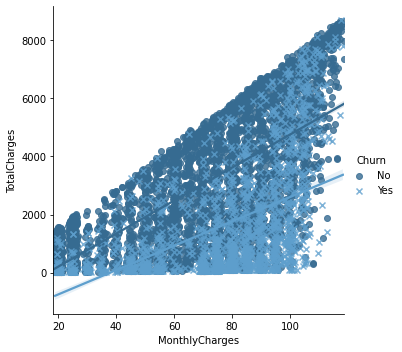

In [0]:
sns.lmplot(x='MonthlyCharges',y='TotalCharges',data=churn_df,fit_reg=True, hue="Churn", markers=["o", "x"], palette="Blues_d") 

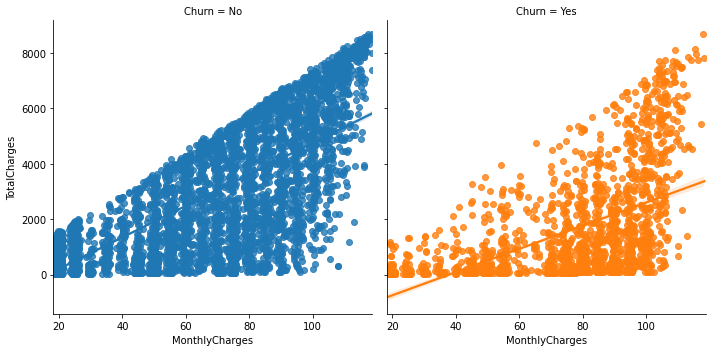

In [0]:
sns.lmplot(x='MonthlyCharges',y='TotalCharges',data=churn_df,fit_reg=True, col="Churn", hue="Churn") 

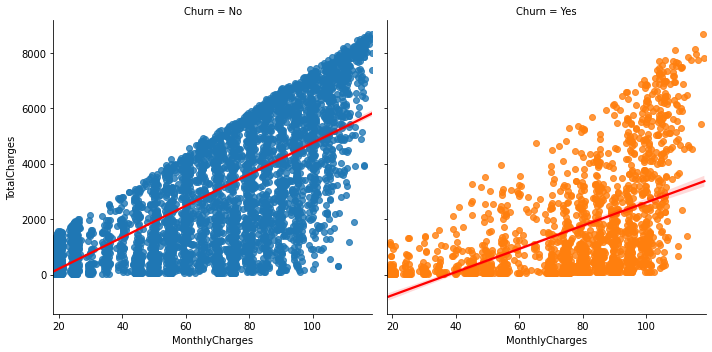

In [0]:
sns.lmplot(x='MonthlyCharges',y='TotalCharges',data=churn_df,fit_reg=True, col="Churn", hue="Churn", line_kws={'color':'red'}) 

In [0]:
churn_df[['TotalCharges','MonthlyCharges']].corr()

,TotalCharges,MonthlyCharges
TotalCharges,1.000000,0.651136
MonthlyCharges,0.651136,1.000000


In [0]:
churn_df[churn_df['Churn']=='No'][['TotalCharges','MonthlyCharges']].corr()

,TotalCharges,MonthlyCharges
TotalCharges,1.000000,0.757311
MonthlyCharges,0.757311,1.000000


In [0]:
churn_no_df=churn_df[(churn_df['Churn']=='No') & (churn_df['TotalCharges'].isna()==False)]
churn_no_df.shape[0]

5146

In [0]:
churn_no_df.isna().any()

customerID          False
SeniorCitizen       False
tenure              False
ServiceCount        False
Contract            False
PaperlessBilling    False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [0]:
from scipy import stats
slope, intercept, r_value, p_value, std_err=stats.linregress(churn_no_df['MonthlyCharges'],churn_no_df['TotalCharges'])

In [0]:
print ("slope     : " ,slope)
print ("intercept  : " ,intercept)
print ("r_value :  " ,r_value)
print ("p_value :  ", p_value)
print ("std_err :  ",std_err)
print("R-squared: ",  r_value**2)

slope     :  56.75211428306715
intercept  :  -924.1594617231112
r_value :   0.7573113760322048
p_value :   0.0
std_err :   0.6823483644437863
R-squared:  0.5735205202677914


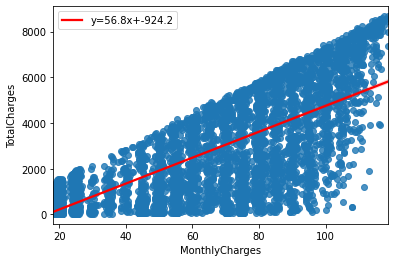

In [0]:
ax=sns.regplot(x='MonthlyCharges', y='TotalCharges', data=churn_no_df, line_kws={'color':'red','label':'y={0:.1f}x+{1:.1f}'.format(slope,intercept)})
ax.legend(loc="best")

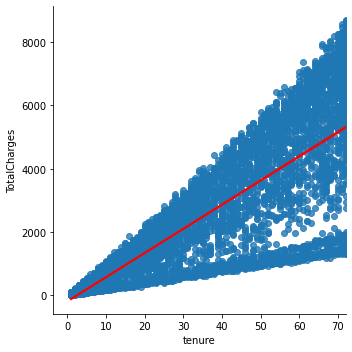

In [0]:
sns.lmplot(x='tenure',y='TotalCharges',data=churn_df,fit_reg=True, line_kws={'color':'red'}) 

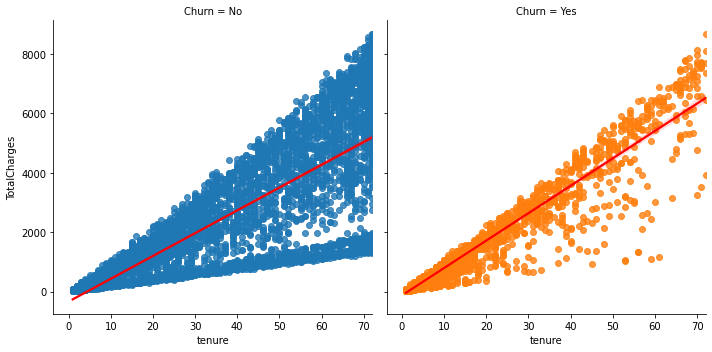

In [0]:
sns.lmplot(x='tenure',y='TotalCharges',data=churn_df,fit_reg=True, col="Churn", hue="Churn", line_kws={'color':'red'}) 

In [0]:
churn_df[['TotalCharges','tenure']].corr()

,TotalCharges,tenure
TotalCharges,1.000000,0.826326
tenure,0.826326,1.000000


In [0]:
churn_df[churn_df['Churn']=='No'][['TotalCharges','tenure']].corr()

,TotalCharges,tenure
TotalCharges,1.000000,0.793595
tenure,0.793595,1.000000


In [0]:
slope, intercept, r_value, p_value, std_err=stats.linregress(churn_no_df['tenure'],churn_no_df['TotalCharges'])

In [0]:
print ("slope     : " ,slope)
print ("intercept  : " ,intercept)
print ("r_value :  " ,r_value)
print ("p_value :  ", p_value)
print ("std_err :  ",std_err)
print("R-squared: ",  r_value**2)

slope     :  76.82924619200716
intercept  :  -334.93658083521996
r_value :   0.7935949203718221
p_value :   0.0
std_err :   0.8212957699802916
R-squared:  0.6297928976399587


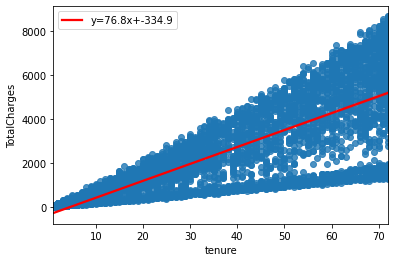

In [0]:
ax=sns.regplot(x='tenure', y='TotalCharges', data=churn_no_df, line_kws={'color':'red','label':'y={0:.1f}x+{1:.1f}'.format(slope,intercept)})
ax.legend(loc="best")

In [0]:
churn_no_df['tenure_charges']=churn_no_df['tenure']*churn_no_df['MonthlyCharges']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
churn_no_df.head()

,customerID,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,tenure_charges
0,7590-VHVEG,0,1,2,Month-to-month,Yes,29.85,29.85,No,29.85
1,5575-GNVDE,0,34,4,One year,No,56.95,1889.50,No,1936.30
3,7795-CFOCW,0,45,4,One year,No,42.30,1840.75,No,1903.50
6,1452-KIOVK,0,22,5,Month-to-month,Yes,89.10,1949.40,No,1960.20
7,6713-OKOMC,0,10,2,Month-to-month,No,29.75,301.90,No,297.50


In [0]:
churn_no_df[churn_no_df['Churn']=='No'][['TotalCharges','tenure_charges']].corr()

,TotalCharges,tenure_charges
TotalCharges,1.000000,0.999536
tenure_charges,0.999536,1.000000


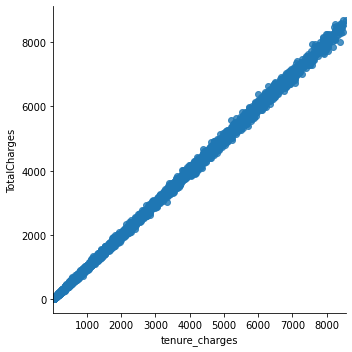

In [0]:
sns.lmplot(x='tenure_charges',y='TotalCharges',data=churn_no_df) 

In [0]:
slope, intercept, r_value, p_value, std_err=stats.linregress(churn_no_df['tenure_charges'],churn_no_df['TotalCharges'])

In [0]:
print ("slope     : " ,slope)
print ("intercept  : " ,intercept)
print ("r_value :  " ,r_value)
print ("p_value :  ", p_value)
print ("std_err :  ",std_err)
print("R-squared: ",  r_value**2)

slope     :  1.0001851163629358
intercept  :  -0.4347902277722824
r_value :   0.9995362189853295
p_value :   0.0
std_err :   0.00042486650354260744
R-squared:  0.9990726530634886


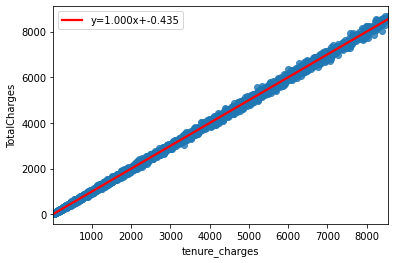

In [0]:
ax=sns.regplot(x='tenure_charges', y='TotalCharges', data=churn_no_df, line_kws={'color':'red','label':'y={0:.3f}x+{1:.3f}'.format(slope,intercept)})
ax.legend(loc="best")

In [0]:
def fillna(tenure, monthlycharge):
  if tenure == 0 :
    totcharges = monthlycharge
  else :
    totcharges = tenure * monthlycharge
    totcharges = intercept+(totcharges*slope)
  return round(totcharges,2)

In [0]:
churn_df['TotChargeNew'] = churn_df.apply(lambda x: x['TotalCharges'] if not pd.isna(x['TotalCharges']) else fillna(x['tenure'],x['MonthlyCharges']), axis=1)


In [0]:
churn_df[churn_df.isna().any(axis=1)]

,customerID,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,TotChargeNew
488,4472-LVYGI,0,0,5,Two year,Yes,52.55,NaN,No,52.55
699,8338-QIUNR,0,72,6,Two year,Yes,66.50,NaN,No,4788.45
753,3115-CZMZD,0,0,7,Two year,No,20.25,NaN,No,20.25
936,5709-LVOEQ,0,0,7,Two year,No,80.85,NaN,No,80.85
939,0347-UBKUZ,0,15,7,Month-to-month,No,19.90,NaN,No,298.12
1037,4581-LNWUM,0,13,4,Month-to-month,No,49.15,NaN,No,638.63
1082,4367-NUYAO,0,0,8,Two year,No,25.75,NaN,No,25.75
1340,1371-DWPAZ,0,0,6,Two year,No,56.05,NaN,No,56.05
1541,2429-AYKKO,0,72,7,Two year,No,19.85,NaN,No,1429.03
1914,5356-CSVSQ,0,3,5,Month-to-month,No,64.60,NaN,No,193.40


In [0]:
churn_actual_df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_actual.csv')

In [0]:
churn_merged=pd.merge(churn_df, churn_actual_df)

In [0]:
churn_merged[churn_merged.isna().any(axis=1)]

,customerID,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,TotChargeNew,TotChargesAct
488,4472-LVYGI,0,0,5,Two year,Yes,52.55,NaN,No,52.55,
699,8338-QIUNR,0,72,6,Two year,Yes,66.50,NaN,No,4788.45,4811.6
753,3115-CZMZD,0,0,7,Two year,No,20.25,NaN,No,20.25,
936,5709-LVOEQ,0,0,7,Two year,No,80.85,NaN,No,80.85,
939,0347-UBKUZ,0,15,7,Month-to-month,No,19.90,NaN,No,298.12,320.45
1037,4581-LNWUM,0,13,4,Month-to-month,No,49.15,NaN,No,638.63,649.4
1082,4367-NUYAO,0,0,8,Two year,No,25.75,NaN,No,25.75,
1340,1371-DWPAZ,0,0,6,Two year,No,56.05,NaN,No,56.05,
1541,2429-AYKKO,0,72,7,Two year,No,19.85,NaN,No,1429.03,1434.1
1914,5356-CSVSQ,0,3,5,Month-to-month,No,64.60,NaN,No,193.40,174.2
